<ipython-input-9-76fbaae06088>:35: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_cleaned.fillna(method='ffill', inplace=True)


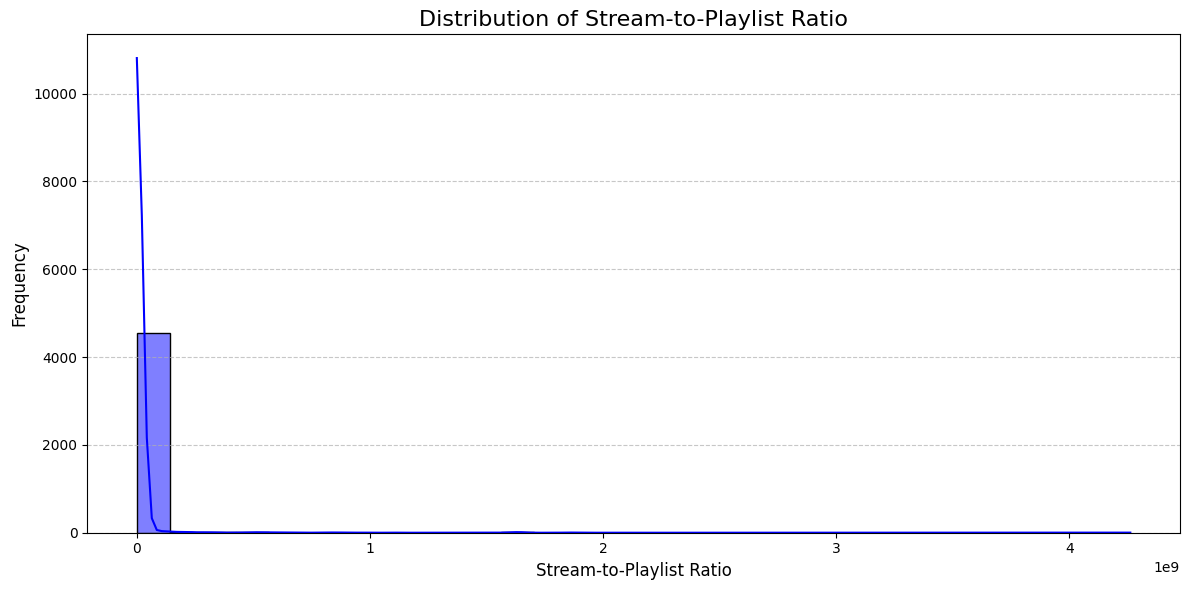

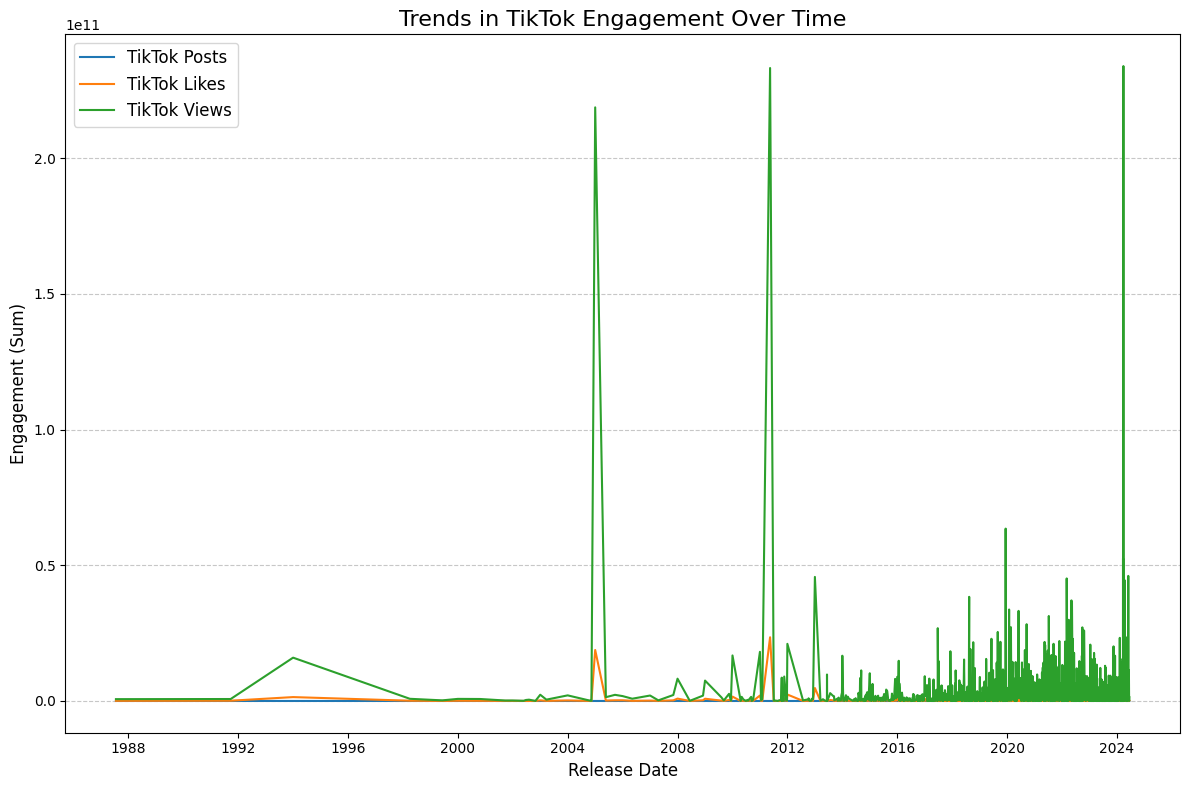

<ipython-input-9-76fbaae06088>:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


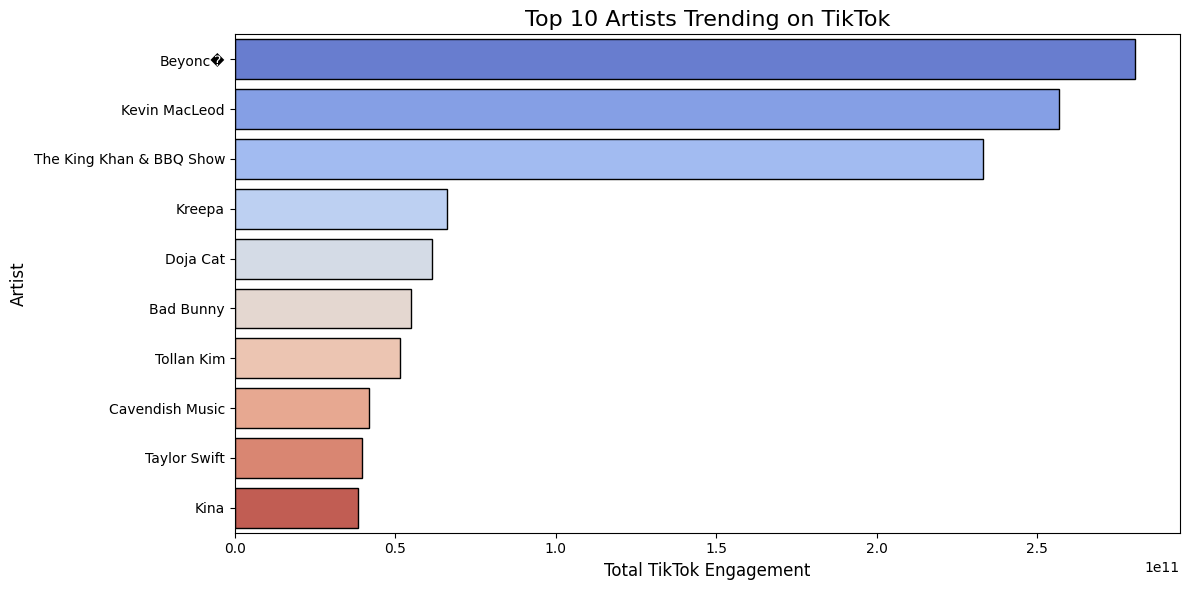

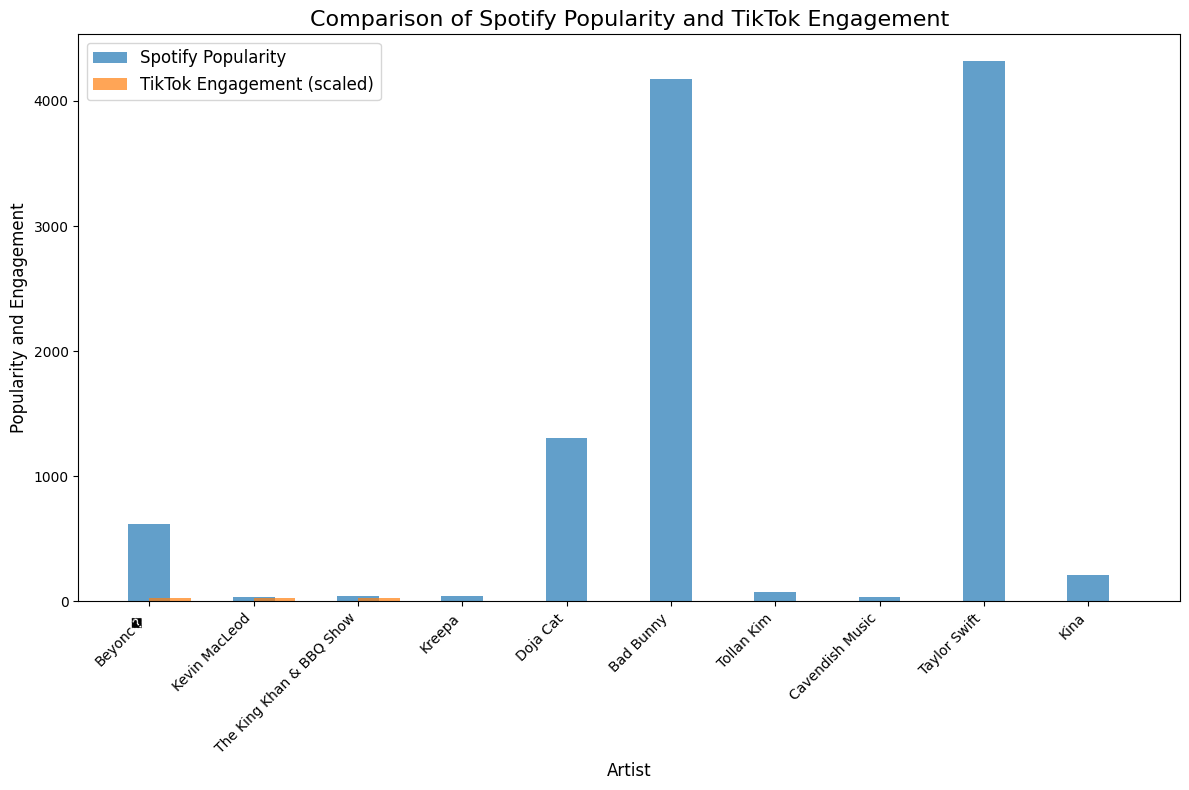

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'Most Streamed Spotify Songs 2024.csv'
data = pd.read_csv(file_path, encoding='utf-8', encoding_errors='replace')


# Data Cleaning
# Replace "Unknown" with NaN
data.replace("Unknown", np.nan, inplace=True)

# Convert numeric columns stored as objects to float
columns_to_convert = [
    'Spotify Streams', 'Spotify Playlist Count', 'Spotify Playlist Reach',
    'YouTube Views', 'YouTube Likes', 'TikTok Posts',
    'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach',
    'AirPlay Spins', 'SiriusXM Spins', 'Deezer Playlist Reach',
    'Pandora Streams', 'Pandora Track Stations', 'Shazam Counts'
]
for col in columns_to_convert:
    data[col] = data[col].replace(',', '', regex=True).astype(float)

# Convert 'Release Date' to datetime
data['Release Date'] = pd.to_datetime(data['Release Date'], errors='coerce')

# Handling missing values
threshold_remove = 0.5  # Drop columns with >50% missing values
missing_percentage = data.isnull().mean()
columns_to_drop = missing_percentage[missing_percentage > threshold_remove].index
data_cleaned = data.drop(columns=columns_to_drop)

data_cleaned.fillna(method='ffill', inplace=True)
data_cleaned.drop_duplicates(inplace=True)

# Create new feature: Stream-to-Playlist ratio
data_cleaned['Stream_to_Playlist_Ratio'] = (
    data_cleaned['Spotify Streams'] / data_cleaned['Spotify Playlist Count']
)

# Visualization: Distribution of Stream-to-Playlist Ratio
plt.figure(figsize=(12, 6))
sns.histplot(data_cleaned['Stream_to_Playlist_Ratio'].dropna(), bins=30, kde=True, color='blue', edgecolor='black')
plt.title('Distribution of Stream-to-Playlist Ratio', fontsize=16)
plt.xlabel('Stream-to-Playlist Ratio', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Top tracks by Stream-to-Playlist Ratio
top_tracks = data_cleaned[['Track', 'Artist', 'Stream_to_Playlist_Ratio']].sort_values(
    by='Stream_to_Playlist_Ratio', ascending=False).head(10)

# Trends in TikTok Engagement
data_cleaned['Total_TikTok_Engagement'] = (
    data_cleaned['TikTok Posts'] + data_cleaned['TikTok Likes'] + data_cleaned['TikTok Views']
)
tiktok_columns = ['TikTok Posts', 'TikTok Likes', 'TikTok Views']
tiktok_trends = data_cleaned.groupby('Release Date')[tiktok_columns].sum()

plt.figure(figsize=(12, 8))
for column in tiktok_columns:
    plt.plot(tiktok_trends.index, tiktok_trends[column], label=column)

plt.title('Trends in TikTok Engagement Over Time', fontsize=16)
plt.xlabel('Release Date', fontsize=12)
plt.ylabel('Engagement (Sum)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Top artists trending on TikTok
top_artists_tiktok = (
    data_cleaned.groupby('Artist')['Total_TikTok_Engagement']
    .sum()
    .sort_values(ascending=False)
    .head(10)
    .reset_index()
)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=top_artists_tiktok,
    x='Total_TikTok_Engagement',
    y='Artist',
    palette='coolwarm',
    edgecolor='black'
)
plt.title('Top 10 Artists Trending on TikTok', fontsize=16)
plt.xlabel('Total TikTok Engagement', fontsize=12)
plt.ylabel('Artist', fontsize=12)
plt.tight_layout()
plt.show()

# Compare Spotify and TikTok popularity
comparison_data = data_cleaned[['Artist', 'Spotify Popularity', 'Total_TikTok_Engagement']].groupby('Artist').sum()
comparison_data['Combined_Score'] = (
    comparison_data['Spotify Popularity'] + comparison_data['Total_TikTok_Engagement']
)
top_comparison = comparison_data.sort_values(by='Combined_Score', ascending=False).head(10).reset_index()

plt.figure(figsize=(12, 8))
x = range(len(top_comparison['Artist']))

plt.bar(x, top_comparison['Spotify Popularity'], width=0.4, label='Spotify Popularity', align='center', alpha=0.7)
plt.bar(
    x,
    top_comparison['Total_TikTok_Engagement'] / 1e10,  # Scale TikTok engagement for better comparison
    width=0.4,
    label='TikTok Engagement (scaled)',
    align='edge',
    alpha=0.7,
)

plt.xticks(x, top_comparison['Artist'], rotation=45, ha='right')
plt.title('Comparison of Spotify Popularity and TikTok Engagement', fontsize=16)
plt.xlabel('Artist', fontsize=12)
plt.ylabel('Popularity and Engagement', fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()


Spotify және TikTok платформалары бойынша ең танымал әндер мен трендтер
Мәліметтерді талдау:
Бұл зерттеуде Spotify және TikTok платформаларында танымалдылығы жоғары әндер мен әртістердің деректері қолданылды. Зерттеу барысында негізгі көрсеткіштер талданды, деректер тазаланып, визуализация арқылы трендтер анықталды.

Мәліметтерді өңдеу:
Деректерді тазалау:

Белгісіз деректер ("Unknown") NaN мәніне ауыстырылды.
Сандық көрсеткіштер объект типінен float типіне ауыстырылды (мысалы, "Spotify Streams", "TikTok Likes" және т.б.).
Туу күндерін (Release Date) уақыт форматында көрсетілді.
50%-дан астамы жоқ мәндерге ие бағандар жойылды.
Қайталанған деректер жойылды, ал бос мәндер алдыңғы мәнмен толықтырылды (forward fill).
Қосымша көрсеткіштер есептеу:

Stream-to-Playlist Ratio: Әннің Spotify тыңдалымдарының саны мен оның плейлисттерге қосылу санының арақатынасы анықталды.
Total TikTok Engagement: TikTok-тағы барлық көрсеткіштердің (посттар, лайктар, қаралымдар) қосындысы есептелді.
Негізгі нәтижелер:
1. Stream-to-Playlist арақатынасы бойынша әндер:
Талдау нәтижесінде Stream-to-Playlist арақатынасы ең жоғары 10 ән анықталды. Бұл көрсеткіш әр әннің тыңдалу санына байланысты плейлисттердегі танымалдылығын сипаттайды.

Визуализация: Stream-to-Playlist Ratio мәнінің таралуы көрсетілді.
2. TikTok-тағы трендтер:
TikTok платформасында посттар саны, лайктар саны және қаралымдар саны уақыт бойынша талданды.
Ең танымал әртістер: TikTok-та ең көп тартылымға ие болған 10 әртіс анықталды.
3. Spotify және TikTok платформаларындағы танымалдылықты салыстыру:
Spotify танымалдылығы мен TikTok-тағы белсенділік арасындағы байланыс талданды.
Әртістердің осы екі платформада қаншалықты танымал екендігін көрсететін жалпы көрсеткіш есептелді.
Визуализация нәтижелері:
Stream-to-Playlist Ratio таралуы:
Гистограмма арқылы әр әннің тыңдалу мен плейлисттерге қосылу арасындағы байланысы көрсетілді.

TikTok трендтері:
Уақыт бойынша TikTok посттары, лайктары және қаралымдарының өсуі сызықтық график түрінде бейнеленді.

TikTok-та ең танымал әртістер:
Барлық TikTok тартылымдары бойынша ең жоғары нәтижеге жеткен 10 әртістің рейтингі бар диаграмма арқылы көрсетілді.

Spotify мен TikTok танымалдылығының салыстырмасы:
Екі платформаның көрсеткіштері салыстырмалы бар диаграмма арқылы бейнеленді, TikTok көрсеткіштері ыңғайлы болу үшін масштабталды.

Қорытынды:
TikTok пен Spotify байланысы: TikTok-тағы жоғары тартылым Spotify платформасында да танымалдылыққа әсер етеді.
Әртістердің стратегиясы: Әндерді TikTok арқылы жарнамалау тыңдалым санын арттыруда тиімді құрал болып табылады.
Stream-to-Playlist Ratio: Әннің танымалдылығын сипаттайтын негізгі көрсеткіш ретінде қарастырылуы мүмкін.
Бұл зерттеу Spotify және TikTok сияқты платформалардың музыка индустриясындағы өзара байланысын тереңірек түсінуге көмектеседі.